In [1]:
from gprofiler import GProfiler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/aul/homes/msobh002/.conda/envs/concreteAE/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/aul/homes/msobh002/.conda/envs/concreteAE/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# LUAD

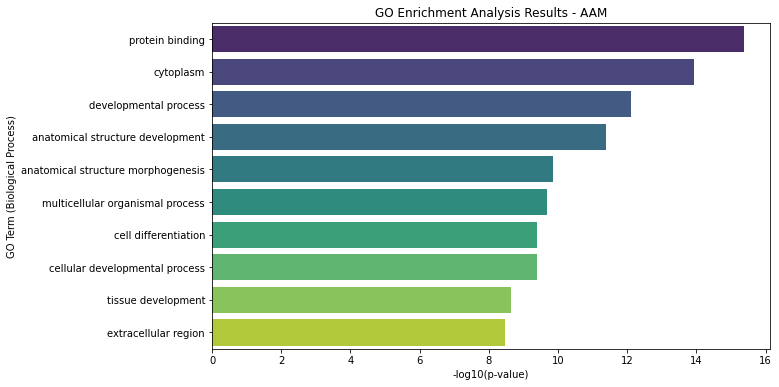

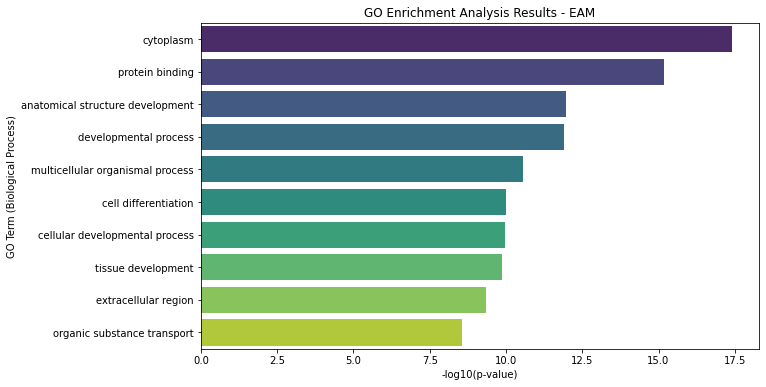

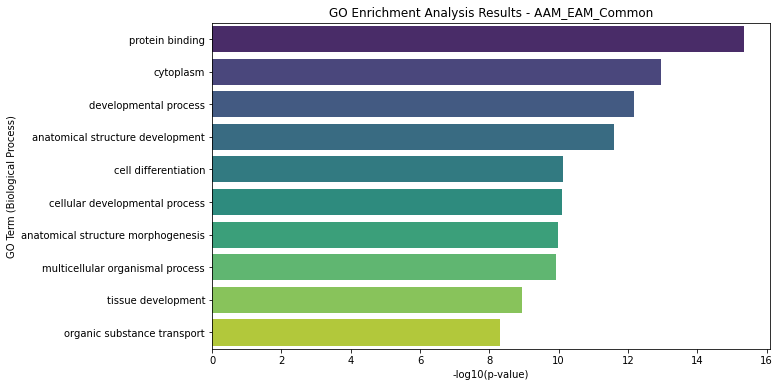

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist()) #, sources=['GO:BP', 'GO:MF', 'GO:CC']

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

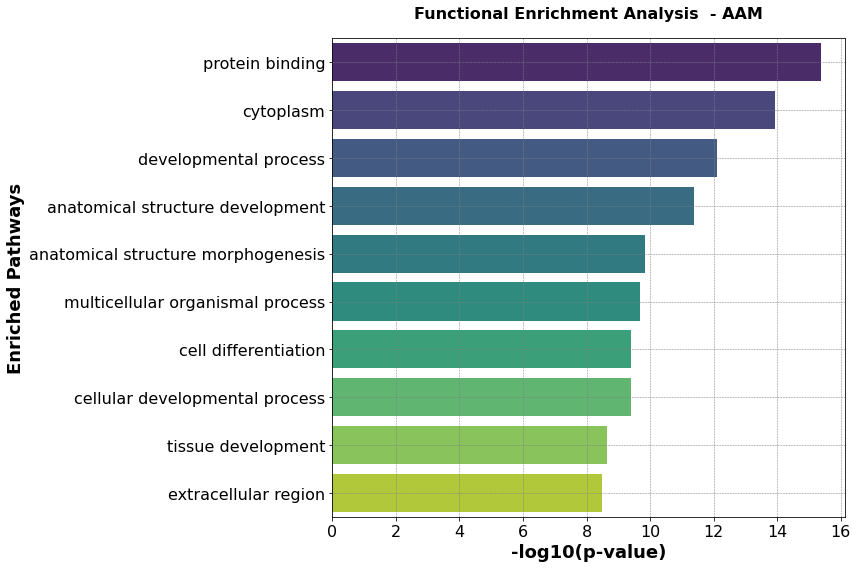

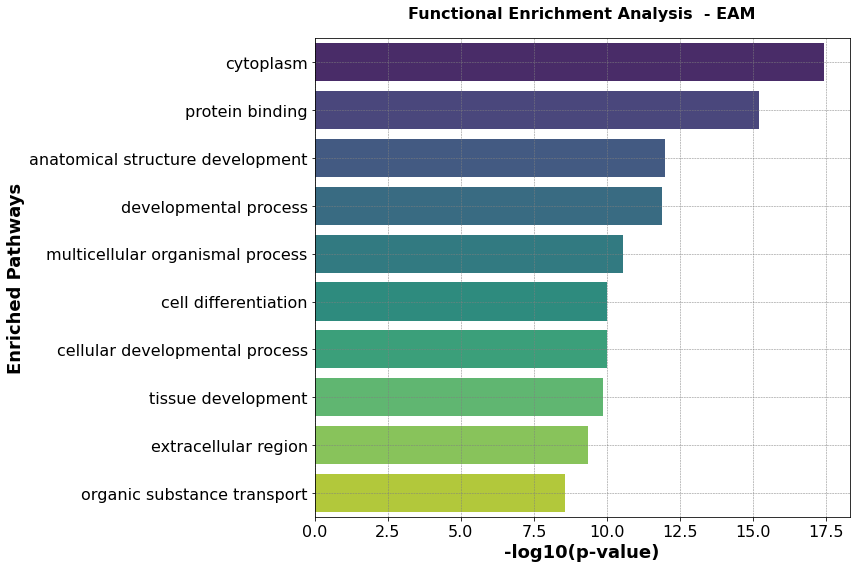

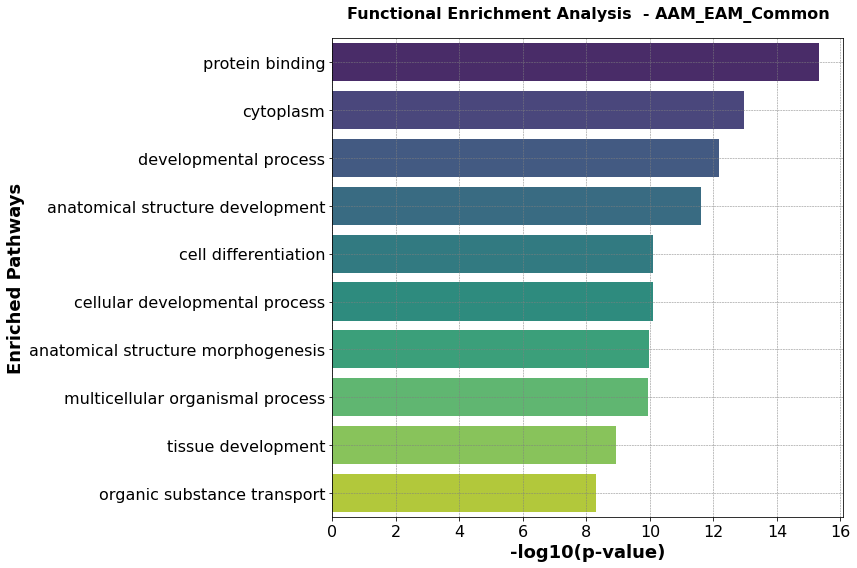

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist()) #, sources=['GO:BP', 'GO:MF', 'GO:CC']

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(12, 8))  # Larger figure size for better visibility and fit
            barplot = sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")

            # Enhance font sizes and labels for publication quality
            plt.xlabel('-log10(p-value)', fontsize=18, fontweight='bold')  # Larger and bolder font for the x-axis label
            plt.ylabel('Enriched Pathways', fontsize=18, fontweight='bold')  # Larger and bolder font for the y-axis label
            plt.title(f'Functional Enrichment Analysis  - {output_label}', fontsize=16, fontweight='bold', pad=20)  # Larger title with padding for better layout

            # Increase tick size
            plt.xticks(fontsize=16)  # Larger x-axis tick labels
            plt.yticks(fontsize=16)  # Larger y-axis tick labels

            # Improve the visual layout, padding and grid
            plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')  # Add a grid for better readability
#             plt.gca().invert_yaxis()  # Invert y-axis to have the top term at the top in the plot

            # Show the plot
            plt.tight_layout()  # Adjust the layout to make room for the larger labels
            plt.show()

        # Save GO results to CSV
#         go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

In [96]:
# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls)

(103, 106, 109)

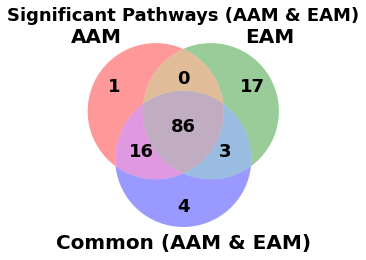

In [108]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls)


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], ('AAM', 'EAM', 'Common (AAM & EAM)'))

# Title and Subtitles
plt.title('Significant Pathways (AAM & EAM)', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

103 106 109
AAM
{'epidermis development'}
EAM
{'response to stress'}


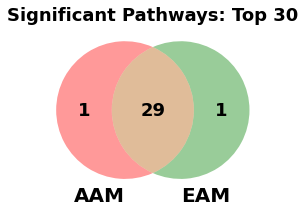

AAM
{'animal organ development', 'positive regulation of cellular process'}
EAM
{'vesicle', 'biological regulation'}


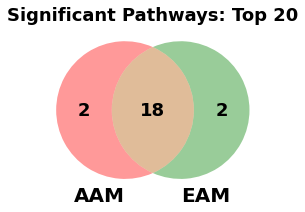

AAM
{'anatomical structure morphogenesis'}
EAM
{'organic substance transport'}


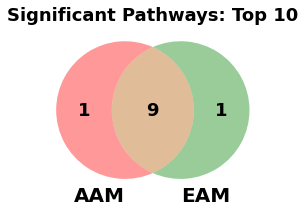

In [173]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 30


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 20


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))
                                
print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))


# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 10


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

                                
# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

75 100 82
AAF
{'epidermis development', 'regulation of multicellular organismal process', 'regulation of developmental process'}
EAF
{'extracellular membrane-bounded organelle', 'regulation of biological process', 'extracellular organelle'}


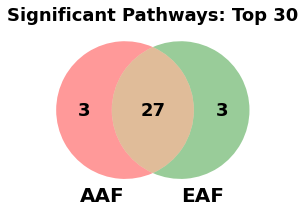

AAF
{'positive regulation of biological process', 'positive regulation of cellular process'}
EAF
{'extracellular vesicle', 'extracellular organelle'}


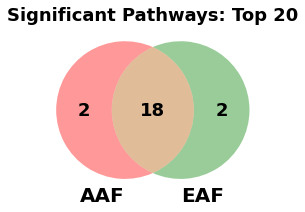

AAF
{'anatomical structure morphogenesis'}
EAF
{'vesicle'}


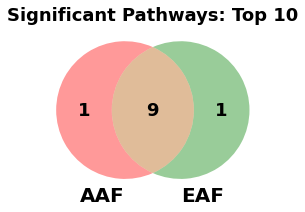

In [174]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 30


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 20


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 10


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

103 75 93
AAM
{'extracellular membrane-bounded organelle', 'extracellular organelle'}
AAF
{'regulation of growth', 'regulation of developmental process'}


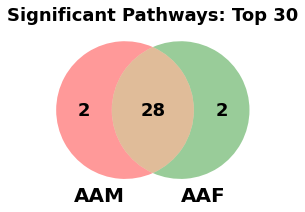

AAM
{'animal organ development', 'epithelium development'}
AAF
{'vesicle', 'biological regulation'}


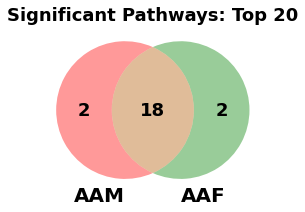

AAM
set()
AAF
set()


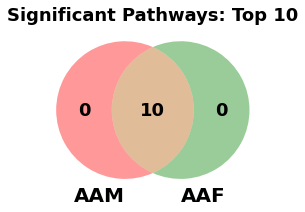

In [175]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 30


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 20


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 10


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

106 100 109
EAM
{'response to stress', 'regulation of multicellular organismal process'}
EAF
{'regulation of growth', 'regulation of biological process'}


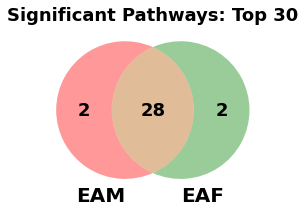

EAM
{'positive regulation of biological process', 'epithelium development'}
EAF
{'extracellular vesicle', 'extracellular organelle'}


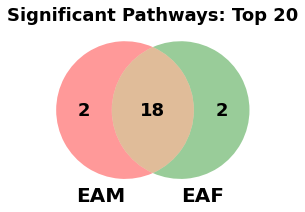

EAM
{'organic substance transport'}
EAF
{'vesicle'}


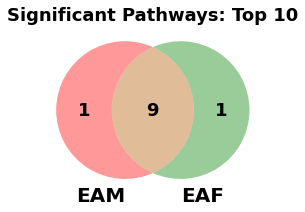

In [176]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 30


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 20


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

top= 10


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

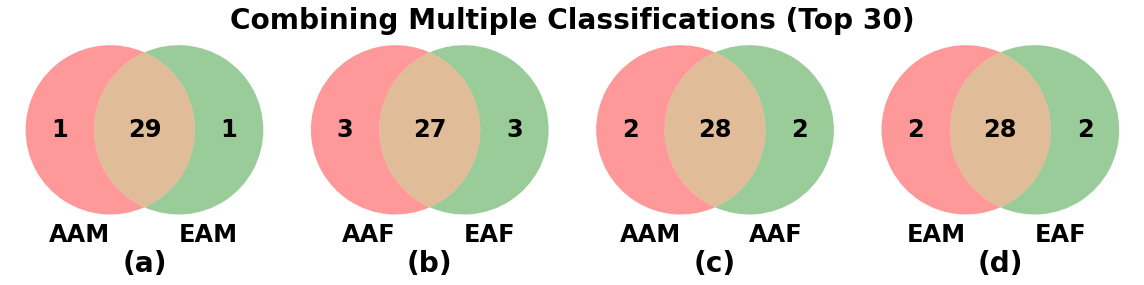

In [166]:
# Top 30

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (1, 1, 29),  # Data for Venn diagram (a)
    (3, 3, 27),  # Data for Venn diagram (b)
    (2, 2, 28),  # Data for Venn diagram (c)
    (2, 2, 28)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Combining Multiple Classifications (Top 30)', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


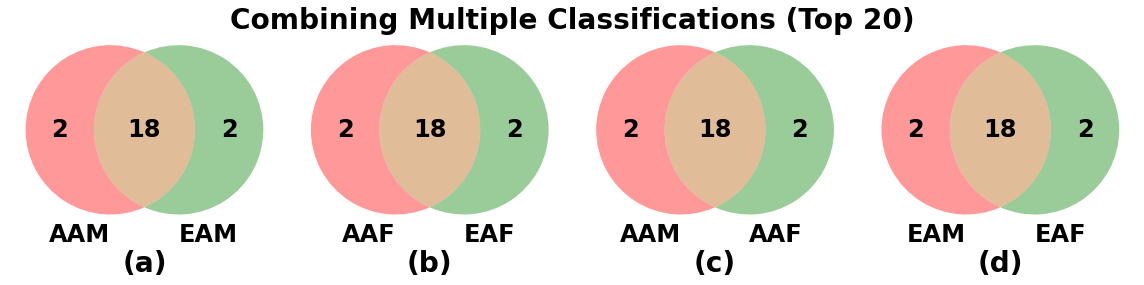

In [167]:
# Top 20

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (2, 2, 18),  # Data for Venn diagram (a)
    (2, 2, 18),  # Data for Venn diagram (b)
    (2, 2, 18),  # Data for Venn diagram (c)
    (2, 2, 18)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Combining Multiple Classifications (Top 20)', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


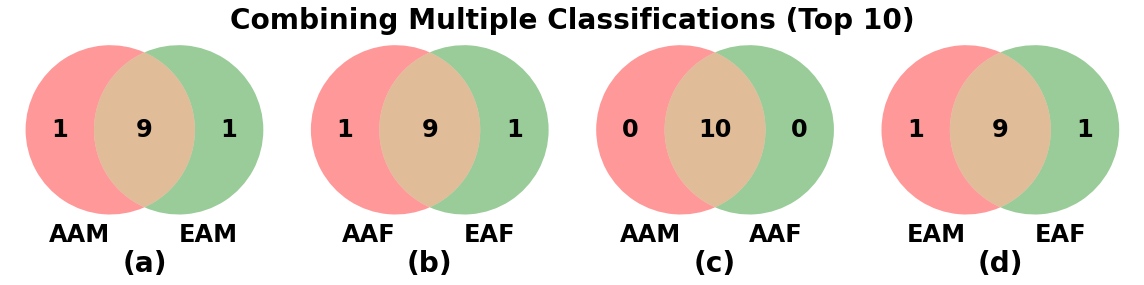

In [168]:
# Top 10

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (1, 1, 9),  # Data for Venn diagram (a)
    (1, 1, 9),  # Data for Venn diagram (b)
    (0, 0, 10),  # Data for Venn diagram (c)
    (1, 1, 9)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Combining Multiple Classifications (Top 10)', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


103 106 109
AAM
{'anatomical structure morphogenesis', 'positive regulation of biological process'}
EAM
{'vesicle', 'epithelium development'}


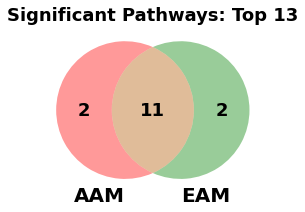

75 100 82
AAF
{'membrane', 'positive regulation of biological process'}
EAF
{'vesicle', 'biological regulation'}


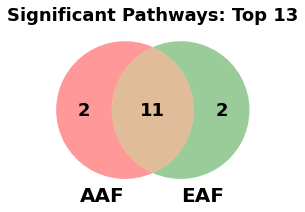

103 75 93
AAM
{'organic substance transport'}
AAF
{'membrane'}


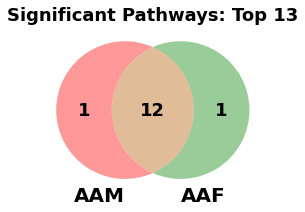

106 100 109
EAM
{'organic substance transport', 'epithelium development'}
EAF
{'anatomical structure morphogenesis', 'biological regulation'}


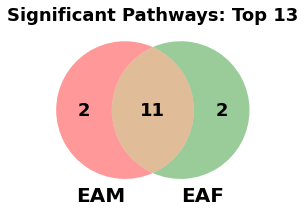

In [177]:
# top 13

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 13


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 13


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 13


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


top= 13


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls[0:top]), set(label2_df_ls[0:top])], (label1, label2))

print(label1)
print(set(label1_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))
print(label2)
print(set(label2_df_ls[0:top])-(set(label1_df_ls[0:top]) & set(label2_df_ls[0:top])))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

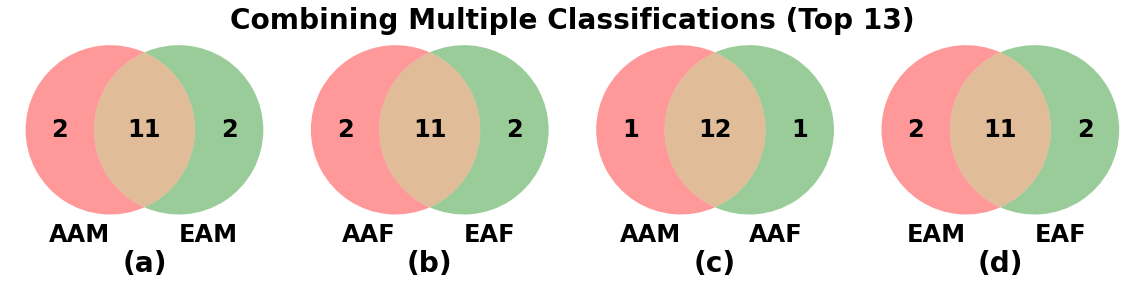

In [178]:
# Top 10

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (2, 2, 11),  # Data for Venn diagram (a)
    (2, 2, 11),  # Data for Venn diagram (b)
    (1, 1, 12),  # Data for Venn diagram (c)
    (2, 2, 11)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Combining Multiple Classifications (Top 13)', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


103 106 109


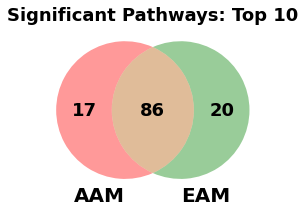

In [162]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'


# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))

# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways: Top {top}', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()


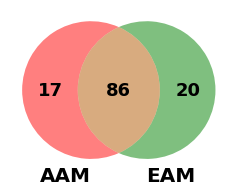

In [154]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sets with dummy values for illustration
# Usually, you would have specific sets of items, but here we directly use subset sizes.
# The subset sizes are (size_only_in_set1, size_only_in_set2, size_intersection)
subset_sizes = (17, 20, 86)

# Create the Venn diagram
# plt.figure(figsize=(8, 6))
# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted(subsets=subset_sizes, set_labels=('AAM', 'EAM'))

# Customizing the colors and transparency of the Venn diagram
# venn.get_patch_by_id('10').set_color('pink')
# venn.get_patch_by_id('01').set_color('green')
# venn.get_patch_by_id('11').set_color('brown')

# Adjust the transparency (alpha) of each set
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_alpha(0.5)

# # Set the font size of the numbers inside the circles
# for text in venn.subset_labels:
#     text.set_fontsize(16)
#     text.set_fontweight('bold')
    
# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Display the plot
# plt.title('Overlap between AAM and EAM', fontsize=18, fontweight='bold')
plt.show()

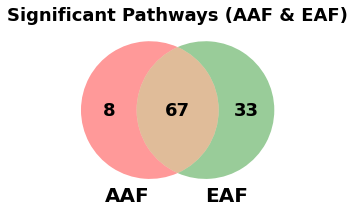

In [127]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls)


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

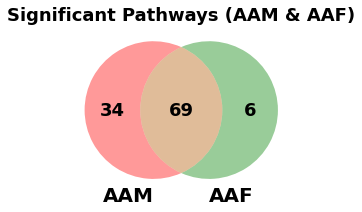

In [128]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls)


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

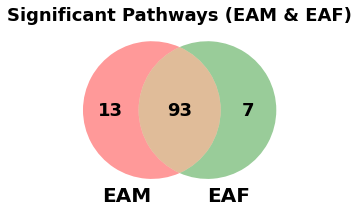

In [129]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls)


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

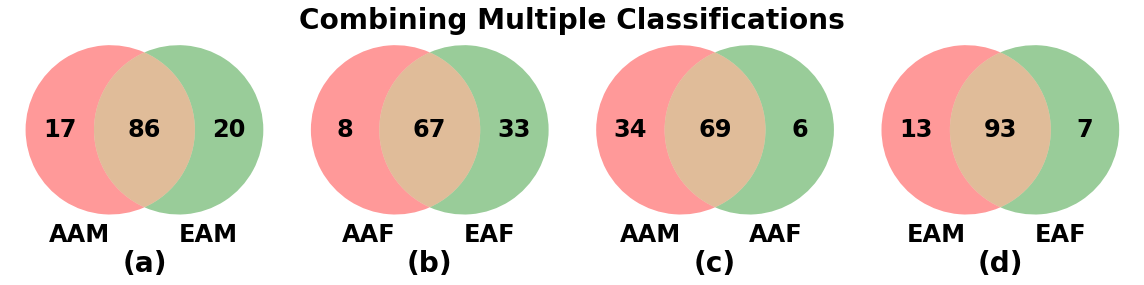

In [144]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (17, 20, 86),  # Data for Venn diagram (a)
    (8, 33, 67),  # Data for Venn diagram (b)
    (34, 6, 69),  # Data for Venn diagram (c)
    (13, 7, 93)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Combining Multiple Classifications', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


In [109]:
# import requests
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from gprofiler import GProfiler
# import urllib.parse

# # Define variables
# random_state = 40
# label1 = 'AAM'
# label2 = 'EAM'

# # File path to the Excel file
# file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# # Load the Excel file
# xls = pd.ExcelFile(file_path)

# # List of sheet names and corresponding output file labels
# sheets = {
#     label1: label1,
#     label2: label2,
#     f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
# }

# # Initialize GProfiler
# gp = GProfiler(return_dataframe=True)

# # Loop through each sheet and perform the analysis
# for sheet_name, output_label in sheets.items():
#     # Access the sheet
#     genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
#     print("____________________________________________")
#     print(output_label)
#     print("____________________________________________")

#     gene_list = genes_df[0].tolist()  # Example LUAD gene list
#     luad_keyword = "Lung Adenocarcinoma"  # Specific keyword for LUAD

#     for gene in gene_list:
#         # Combine the gene name with the LUAD keyword for a more specific search
#         search_term = f"{gene}"
#         encoded_search_term = urllib.parse.quote_plus(search_term)  # URL encode the search term
#         url = f"https://www.ncbi.nlm.nih.gov/research/pubtator-api/publications/export/biocjson?concepts=gene&term={encoded_search_term}"
#         response = requests.get(url)

#         if response.status_code == 200:
#             data = response.json()
#             print(f"Literature for {gene} related to {luad_keyword}:")
#             for item in data.get('documents', []):
#                 print(item['passages'][0]['text'])  # Extract and print relevant text snippets
#         else:
#             print(f"Failed to retrieve literature for {gene}. HTTP Status Code: {response.status_code}")

In [110]:


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from gprofiler import GProfiler

# # Define variables
# random_state = 40
# label1 = 'AAM'
# label2 = 'EAM'

# # File path to the Excel file
# file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# # Load the Excel file
# xls = pd.ExcelFile(file_path)

# # List of sheet names and corresponding output file labels
# sheets = {
#     label1: label1,
#     label2: label2,
#     f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
# }

# # Initialize GProfiler
# gp = GProfiler(return_dataframe=True)

# # Loop through each sheet and perform the analysis
# for sheet_name, output_label in sheets.items():
#     # Access the sheet
#     genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
#     # Perform GO Enrichment Analysis
# #     go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['GO:BP', 'GO:MF', 'GO:CC'])
#     # Using gprofiler for pathway enrichment
#     pathway_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['REAC', 'KEGG', 'WP'])

#     # Check if go_results is not empty before proceeding
#     if not go_results.empty:
#         # Filter for significant results (e.g., p-value < 0.05)
#         significant_go = pathway_results[pathway_results['p_value'] < 0.05]

#         # Ensure there are significant results to plot
#         if not significant_go.empty:
#             # Plotting top 10 GO terms (Biological Process)
#             plt.figure(figsize=(10, 6))
#             sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
#             plt.xlabel('-log10(p-value)')
#             plt.ylabel('Pathways')
#             plt.title(f'Pathway Enrichment Analysis Results - {output_label}')
#             plt.show()

#         # Save GO results to CSV
# #         go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
#     # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
#     # Perform Disease Enrichment Analysis
#     # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
#     # Save Disease results
#     # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

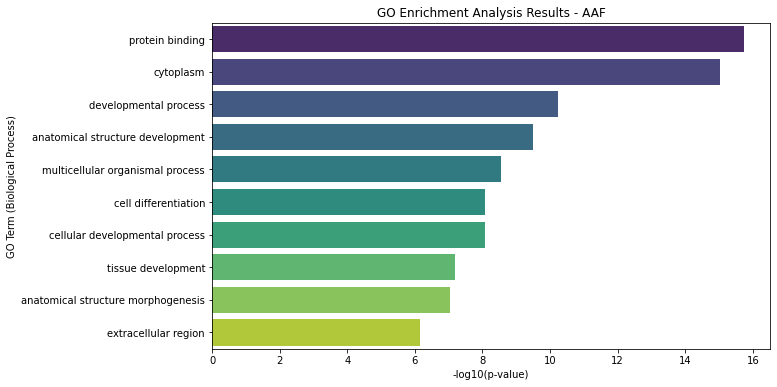

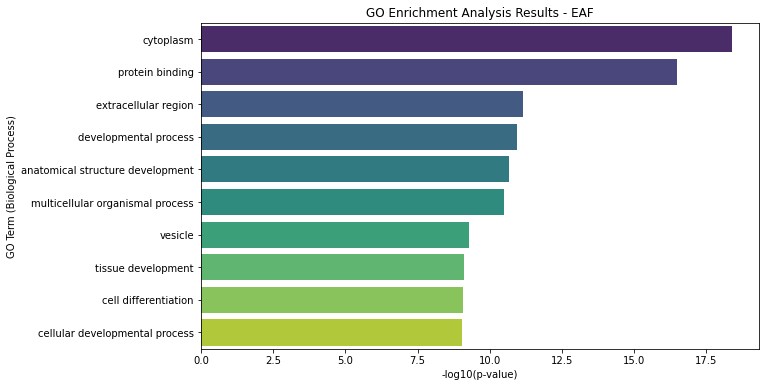

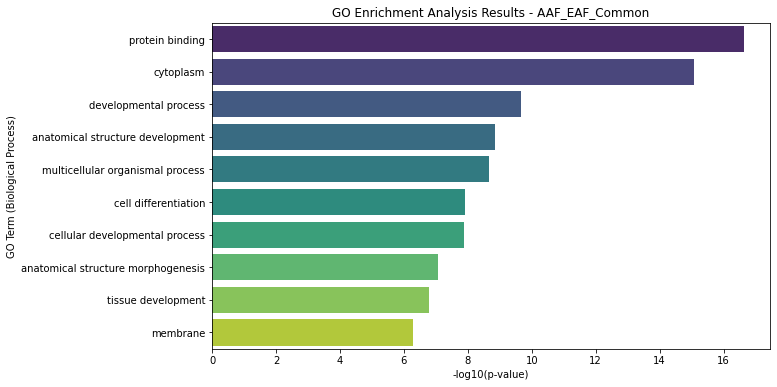

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist()) #, sources=['GO:BP', 'GO:MF', 'GO:CC']

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

75 100 82


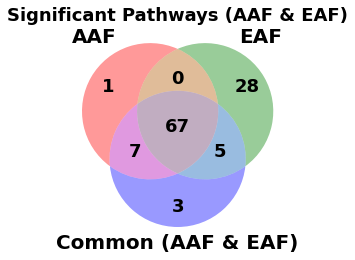

In [112]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

In [82]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from gprofiler import GProfiler

# # Define variables
# random_state = 40
# label1 = 'AAM'
# label2 = 'AAF'

# # File path to the Excel file
# file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# # Load the Excel file
# xls = pd.ExcelFile(file_path)

# # List of sheet names and corresponding output file labels
# sheets = {
#     label1: label1,
#     label2: label2,
#     f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
# }

# # Initialize GProfiler
# gp = GProfiler(return_dataframe=True)

# # Loop through each sheet and perform the analysis
# for sheet_name, output_label in sheets.items():
#     # Access the sheet
#     genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
#     # Perform GO Enrichment Analysis
#     go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['GO:BP', 'GO:MF', 'GO:CC'])

#     # Check if go_results is not empty before proceeding
#     if not go_results.empty:
#         # Filter for significant results (e.g., p-value < 0.05)
#         significant_go = go_results[go_results['p_value'] < 0.05]

#         # Ensure there are significant results to plot
#         if not significant_go.empty:
#             # Plotting top 10 GO terms (Biological Process)
#             plt.figure(figsize=(10, 6))
#             sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
#             plt.xlabel('-log10(p-value)')
#             plt.ylabel('Pathway')
#             plt.title(f'Pathway Enrichment Analysis Results - {output_label}')
#             plt.show()

#         # Save GO results to CSV
# #         go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
#     # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
#     # Perform Disease Enrichment Analysis
#     # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
#     # Save Disease results
#     # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

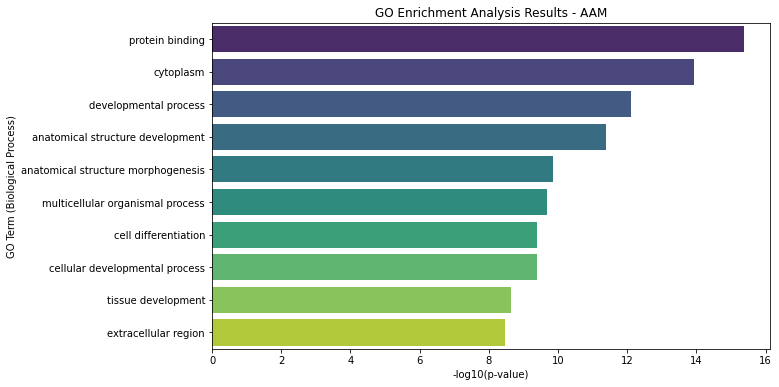

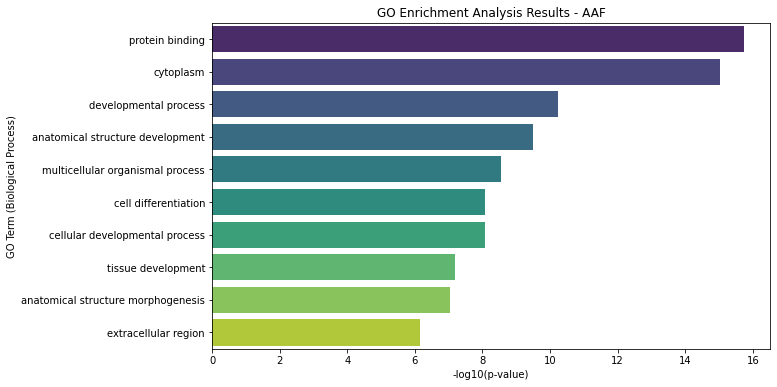

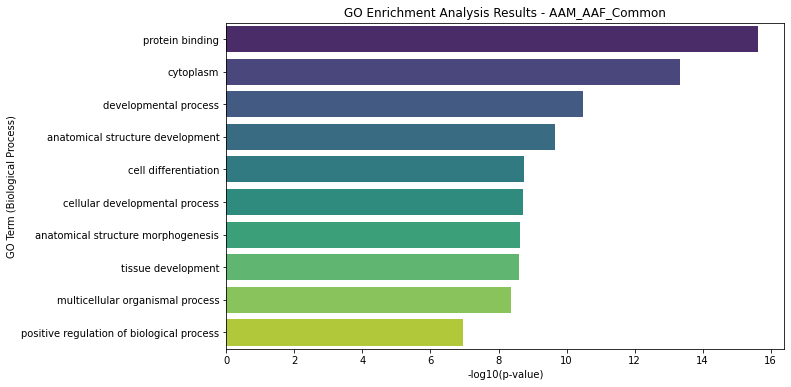

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist()) #, sources=['GO:BP', 'GO:MF', 'GO:CC']

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

103 75 93


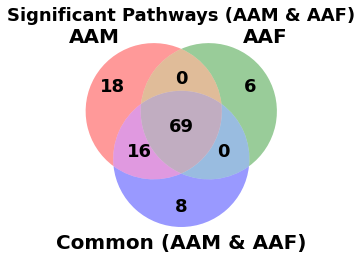

In [114]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

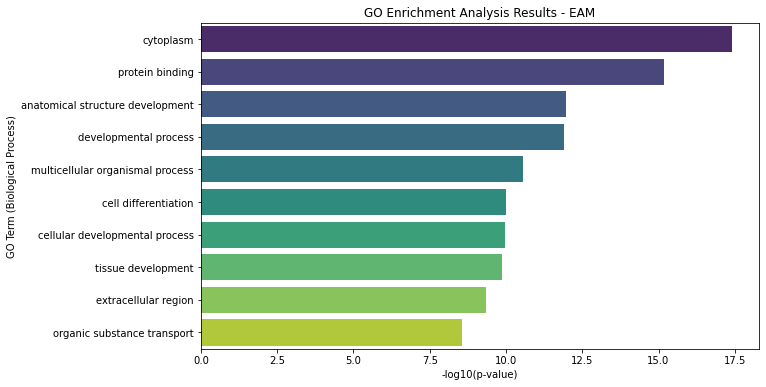

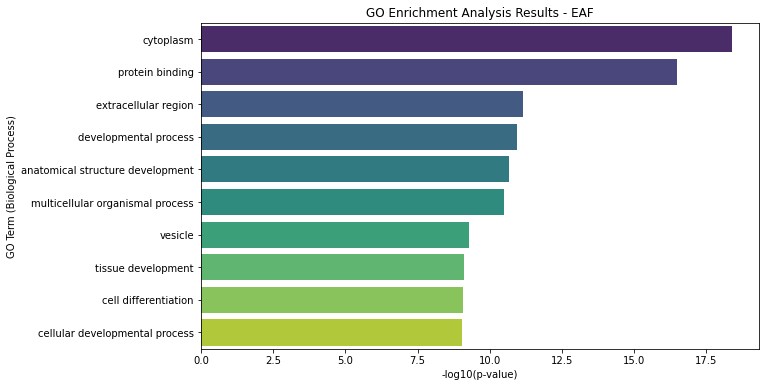

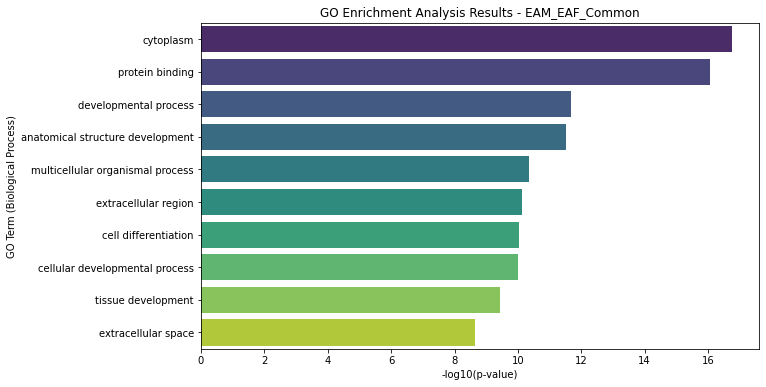

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

106 100 109


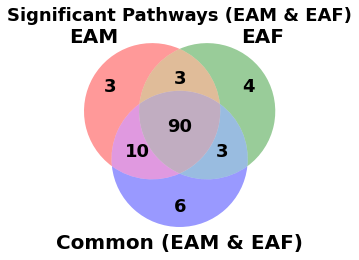

In [116]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUAD_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUAD_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

In [64]:
aam_1= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAM_EAM_random_state_40.xlsx', sheet_name='AAM')
aam_2= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAM_AAF_random_state_40.xlsx', sheet_name='AAM')
aaf_1= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAF_EAF_random_state_40.xlsx', sheet_name='AAF')
aaf_2= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAM_AAF_random_state_40.xlsx', sheet_name='AAF')
eam_1= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAM_EAM_random_state_40.xlsx', sheet_name='EAM')
eam_2= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_EAM_EAF_random_state_40.xlsx', sheet_name='EAM')
eaf_1= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_AAF_EAF_random_state_40.xlsx', sheet_name='EAF')
eaf_2= pd.read_excel(f'../Output/LUAD_Samples/gene_symbols_EAM_EAF_random_state_40.xlsx', sheet_name='EAF')

aam_ls= list(set(aam_1[0]) | set(aam_2[0]))
aaf_ls= list(set(aaf_1[0]) | set(aaf_2[0]))
eam_ls= list(set(eam_1[0]) | set(eam_2[0]))
eaf_ls= list(set(eaf_1[0]) | set(eaf_2[0]))


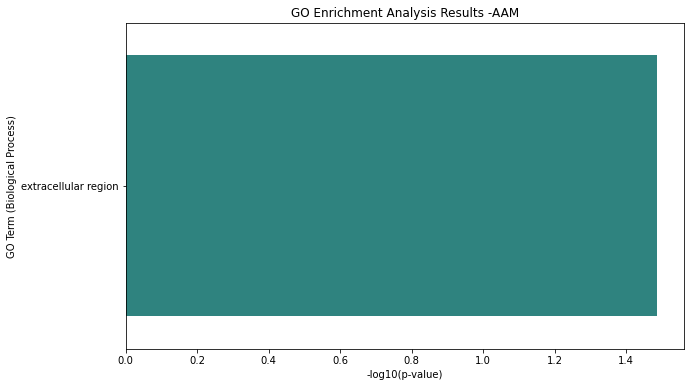

In [47]:
go_results = gp.profile(organism='hsapiens', query= aam_ls, sources=['GO:BP', 'GO:MF', 'GO:CC'])

# Check if go_results is not empty before proceeding
if not go_results.empty:
    # Filter for significant results (e.g., p-value < 0.05)
    significant_go = go_results[go_results['p_value'] < 0.05]

    # Ensure there are significant results to plot
    if not significant_go.empty:
        # Plotting top 10 GO terms (Biological Process)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
        plt.xlabel('-log10(p-value)')
        plt.ylabel('GO Term (Biological Process)')
        plt.title(f'GO Enrichment Analysis Results -AAM')
        plt.show()

    # Save GO results to CSV
    go_results.to_csv(f"../Output/LUAD_Samples/Common_AAM_genderGroupsComparison_go_enrichment_results.csv", index=False)


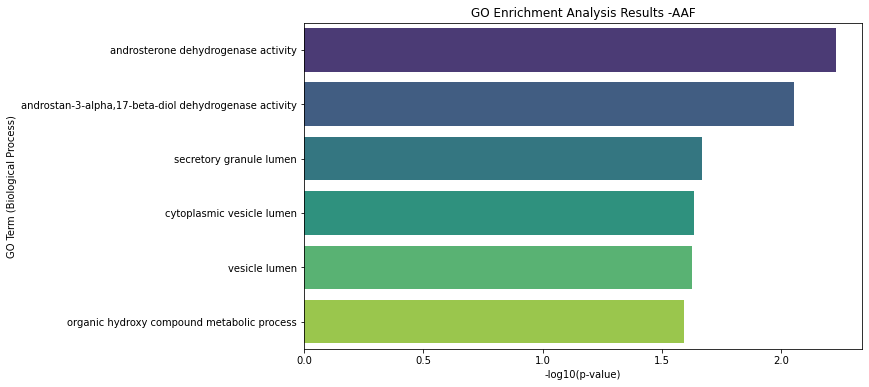

In [48]:
go_results = gp.profile(organism='hsapiens', query= aaf_ls, sources=['GO:BP', 'GO:MF', 'GO:CC'])

# Check if go_results is not empty before proceeding
if not go_results.empty:
    # Filter for significant results (e.g., p-value < 0.05)
    significant_go = go_results[go_results['p_value'] < 0.05]

    # Ensure there are significant results to plot
    if not significant_go.empty:
        # Plotting top 10 GO terms (Biological Process)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
        plt.xlabel('-log10(p-value)')
        plt.ylabel('GO Term (Biological Process)')
        plt.title(f'GO Enrichment Analysis Results -AAF')
        plt.show()

    # Save GO results to CSV
    go_results.to_csv(f"../Output/LUAD_Samples/Common_AAF_genderGroupsComparison_go_enrichment_results.csv", index=False)


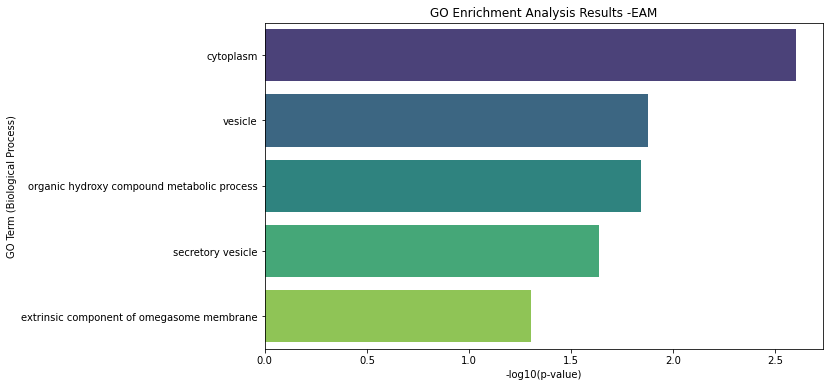

In [49]:
go_results = gp.profile(organism='hsapiens', query= eam_ls, sources=['GO:BP', 'GO:MF', 'GO:CC'])

# Check if go_results is not empty before proceeding
if not go_results.empty:
    # Filter for significant results (e.g., p-value < 0.05)
    significant_go = go_results[go_results['p_value'] < 0.05]

    # Ensure there are significant results to plot
    if not significant_go.empty:
        # Plotting top 10 GO terms (Biological Process)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
        plt.xlabel('-log10(p-value)')
        plt.ylabel('GO Term (Biological Process)')
        plt.title(f'GO Enrichment Analysis Results -EAM')
        plt.show()

    # Save GO results to CSV
    go_results.to_csv(f"../Output/LUAD_Samples/Common_EAM_genderGroupsComparison_go_enrichment_results.csv", index=False)


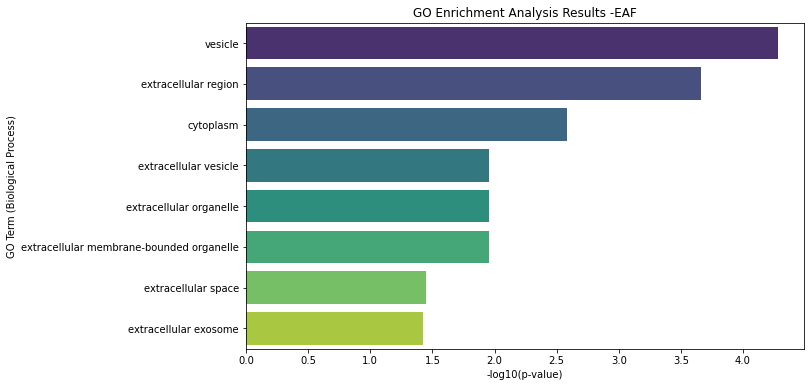

In [65]:
go_results = gp.profile(organism='hsapiens', query= eaf_ls, sources=['GO:BP', 'GO:MF', 'GO:CC'])

# Check if go_results is not empty before proceeding
if not go_results.empty:
    # Filter for significant results (e.g., p-value < 0.05)
    significant_go = go_results[go_results['p_value'] < 0.05]

    # Ensure there are significant results to plot
    if not significant_go.empty:
        # Plotting top 10 GO terms (Biological Process)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
        plt.xlabel('-log10(p-value)')
        plt.ylabel('GO Term (Biological Process)')
        plt.title(f'GO Enrichment Analysis Results -EAF')
        plt.show()

    # Save GO results to CSV
    go_results.to_csv(f"../Output/LUAD_Samples/Common_EAF_genderGroupsComparison_go_enrichment_results.csv", index=False)


# LUSC

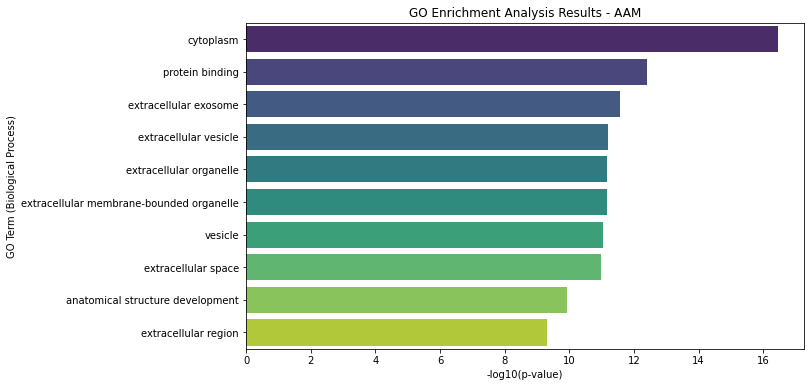

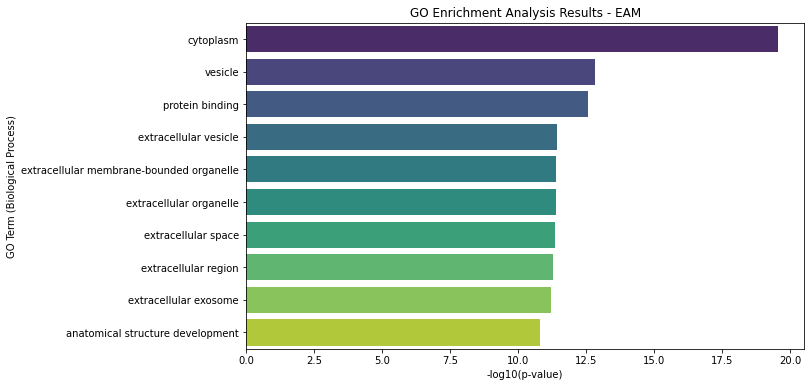

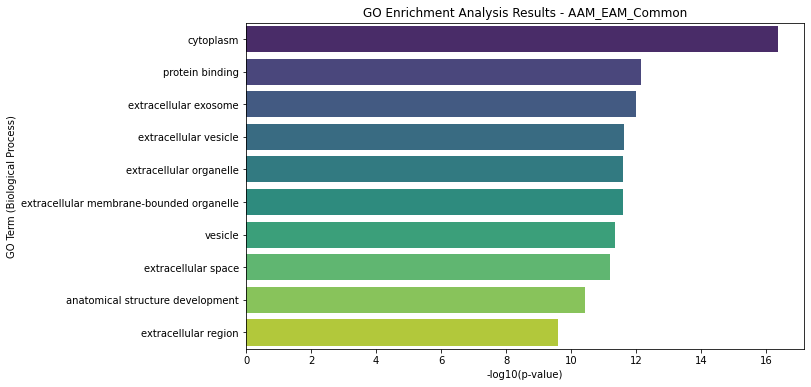

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    if not significant_go.empty:
        # Plotting top 10 GO terms (Biological Process)
        plt.figure(figsize=(12, 8))  # Larger figure size for better visibility and fit
        barplot = sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")

        # Enhance font sizes and labels for publication quality
        plt.xlabel('-log10(p-value)', fontsize=18, fontweight='bold')  # Larger and bolder font for the x-axis label
        plt.ylabel('Enriched Pathways', fontsize=18, fontweight='bold')  # Larger and bolder font for the y-axis label
        plt.title(f'Functional Enrichment Analysis  - {output_label}', fontsize=16, fontweight='bold', pad=20)  # Larger title with padding for better layout

        # Increase tick size
        plt.xticks(fontsize=16)  # Larger x-axis tick labels
        plt.yticks(fontsize=16)  # Larger y-axis tick labels

        # Improve the visual layout, padding and grid
        plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')  # Add a grid for better readability
#             plt.gca().invert_yaxis()  # Invert y-axis to have the top term at the top in the plot

        # Show the plot
        plt.tight_layout()  # Adjust the layout to make room for the larger labels
        plt.show()


        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

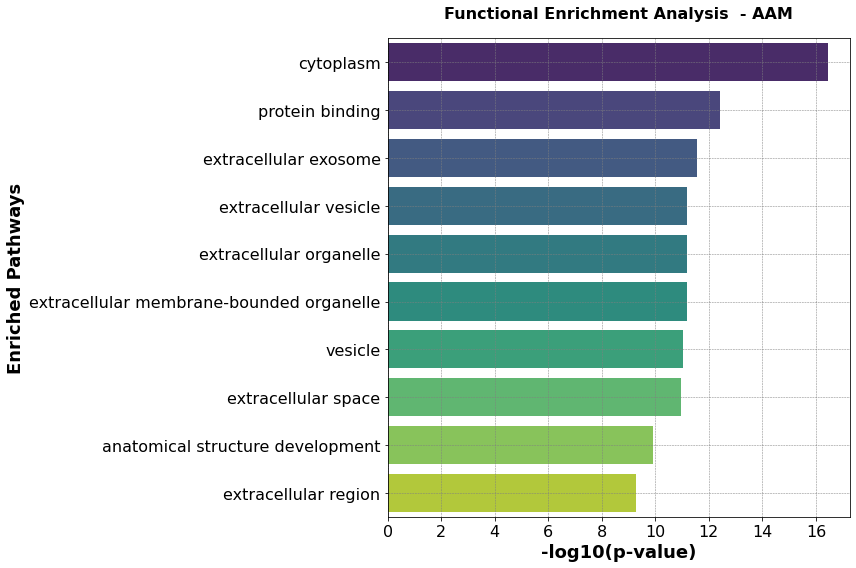

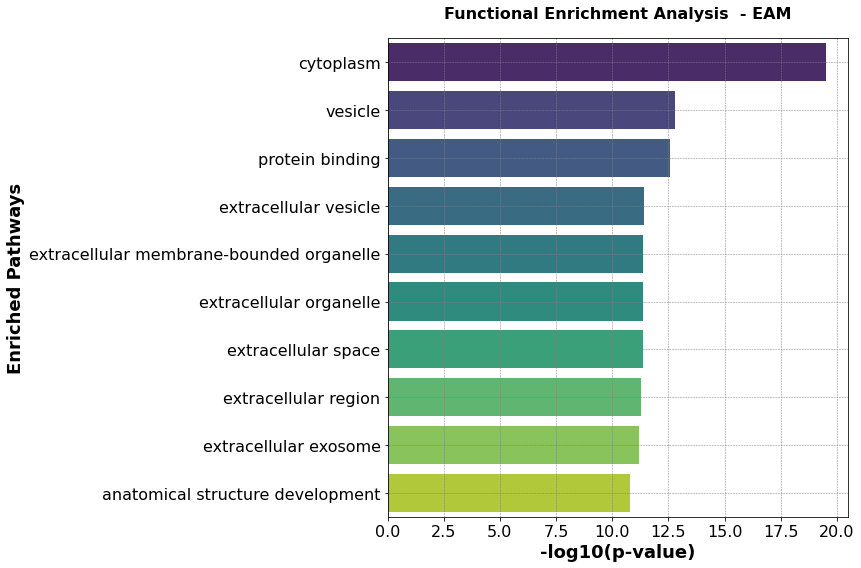

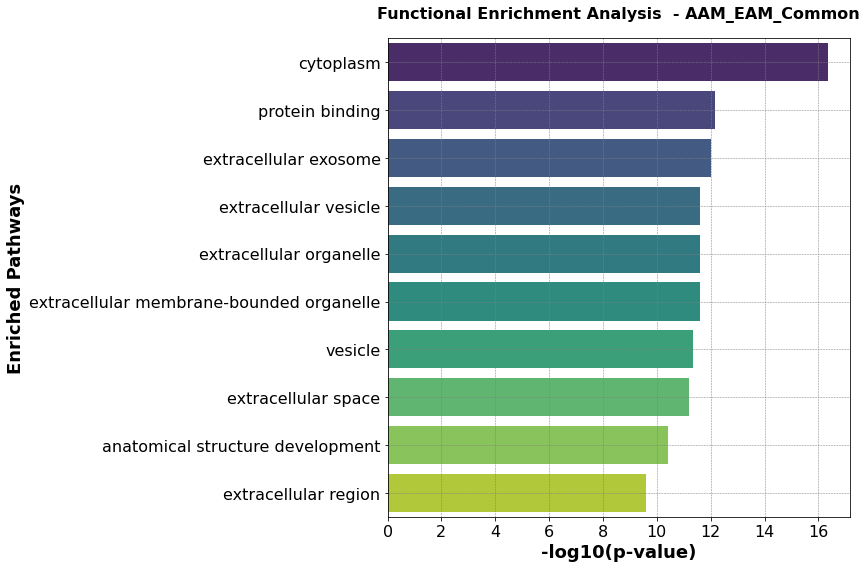

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(12, 8))  # Larger figure size for better visibility and fit
            barplot = sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")

            # Enhance font sizes and labels for publication quality
            plt.xlabel('-log10(p-value)', fontsize=18, fontweight='bold')  # Larger and bolder font for the x-axis label
            plt.ylabel('Enriched Pathways', fontsize=18, fontweight='bold')  # Larger and bolder font for the y-axis label
            plt.title(f'Functional Enrichment Analysis  - {output_label}', fontsize=16, fontweight='bold', pad=20)  # Larger title with padding for better layout

            # Increase tick size
            plt.xticks(fontsize=16)  # Larger x-axis tick labels
            plt.yticks(fontsize=16)  # Larger y-axis tick labels

            # Improve the visual layout, padding and grid
            plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')  # Add a grid for better readability
#             plt.gca().invert_yaxis()  # Invert y-axis to have the top term at the top in the plot

            # Show the plot
            plt.tight_layout()  # Adjust the layout to make room for the larger labels
            plt.show()


        # Save GO results to CSV
        # go_results.to_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

120 137 122


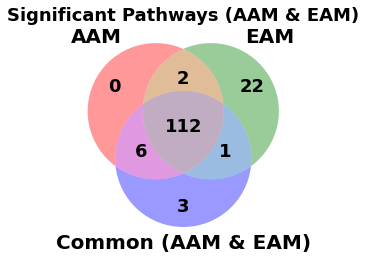

In [118]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

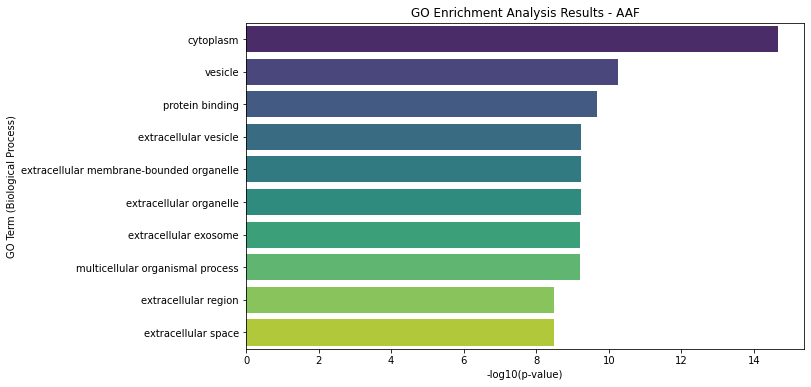

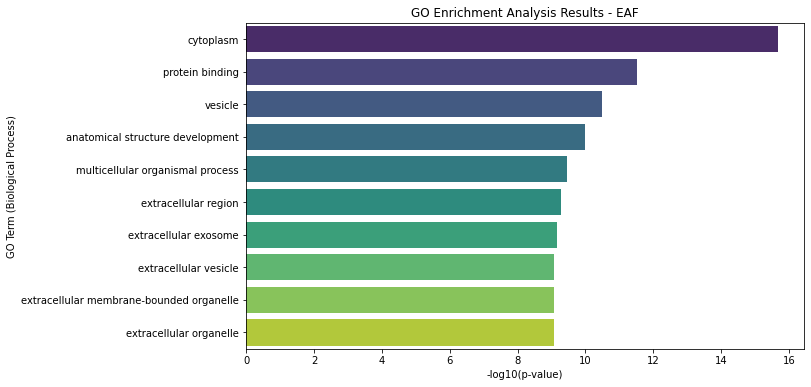

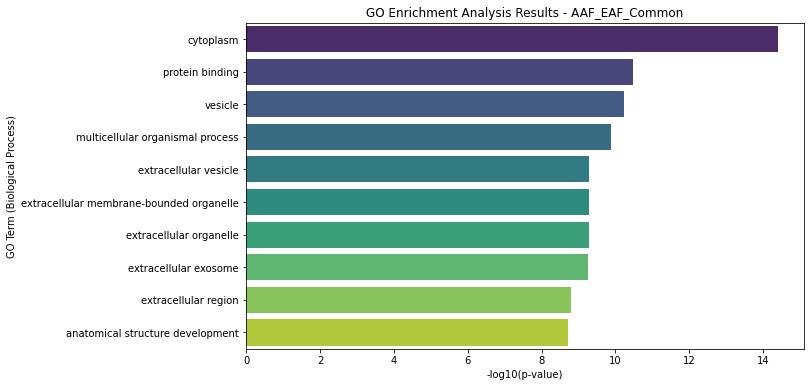

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

130 137 128


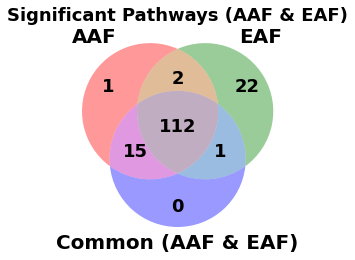

In [120]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

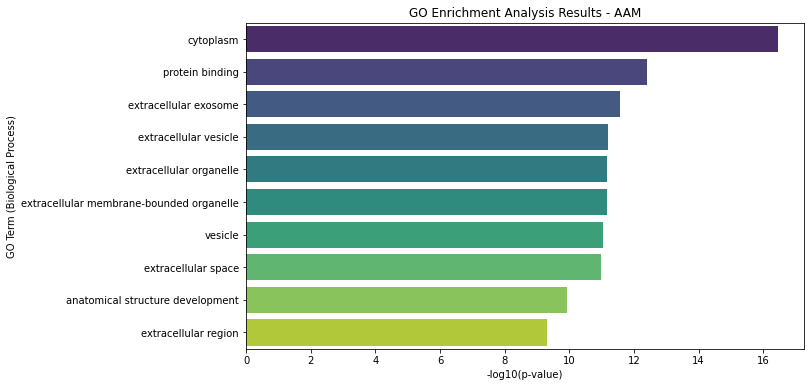

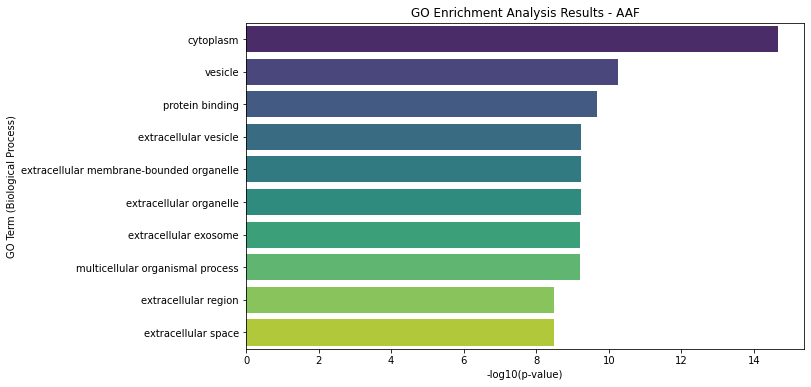

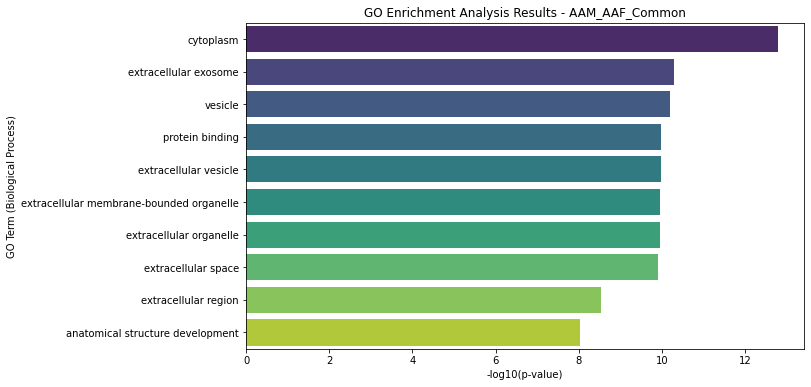

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

120 130 106


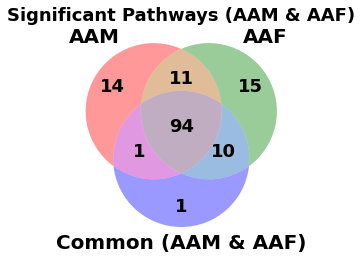

In [122]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

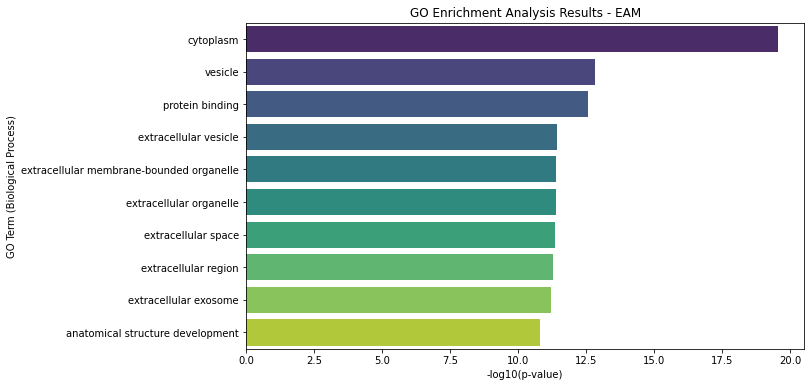

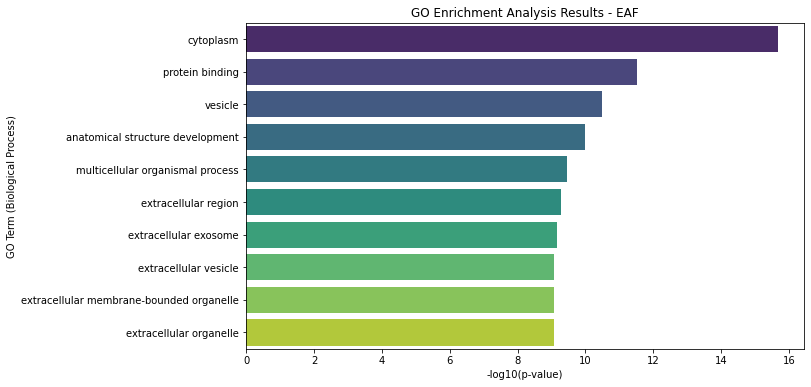

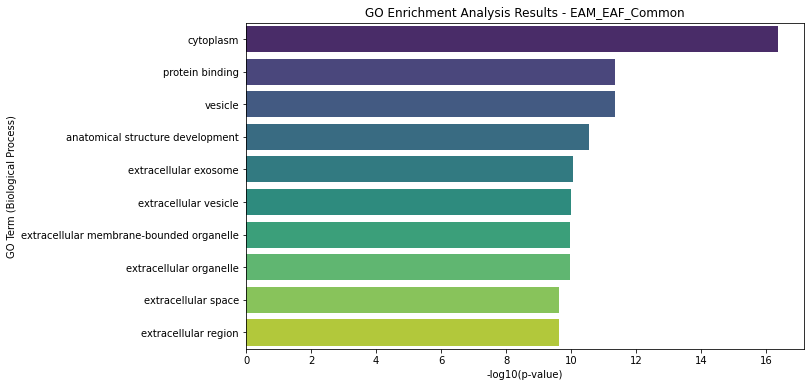

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gprofiler import GProfiler

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Loop through each sheet and perform the analysis
for sheet_name, output_label in sheets.items():
    # Access the sheet
    genes_df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Perform GO Enrichment Analysis
    go_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist())

    # Check if go_results is not empty before proceeding
    if not go_results.empty:
        # Filter for significant results (e.g., p-value < 0.05)
        significant_go = go_results[go_results['p_value'] < 0.05]

        # Ensure there are significant results to plot
        if not significant_go.empty:
            # Plotting top 10 GO terms (Biological Process)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=-np.log10(significant_go['p_value'][:10]), y=significant_go['name'][:10], palette="viridis")
            plt.xlabel('-log10(p-value)')
            plt.ylabel('GO Term (Biological Process)')
            plt.title(f'GO Enrichment Analysis Results - {output_label}')
            plt.show()

        # Save GO results to CSV
        go_results.to_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{output_label}_go_enrichment_results.csv", index=False)
    
    # Uncomment the following lines if you want to perform and save Disease Enrichment Analysis
    # Perform Disease Enrichment Analysis
    # disease_results = gp.profile(organism='hsapiens', query=genes_df[0].tolist(), sources=['DISEASES'])
    
    # Save Disease results
    # disease_results.to_csv(f"../Output/LUAD_Samples/{output_label}_disease_enrichment_results.csv", index=False)

137 137 141


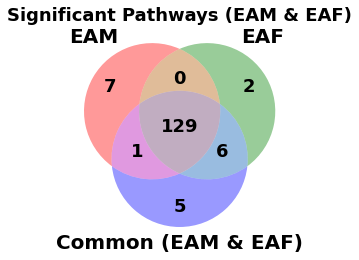

In [124]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn3_unweighted([set(label1_df_ls), set(label2_df_ls), set(label_com_df_ls)], (label1, label2, f'Common ({label1} & {label2})'))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

120 137 122


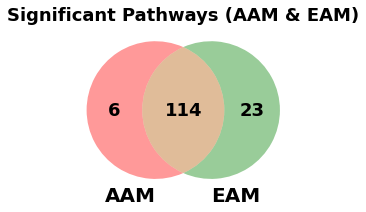

In [136]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'EAM'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

130 137 128


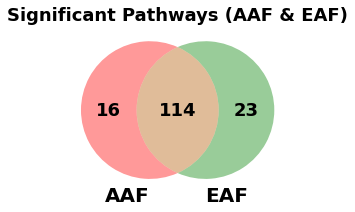

In [137]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAF'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

120 130 106


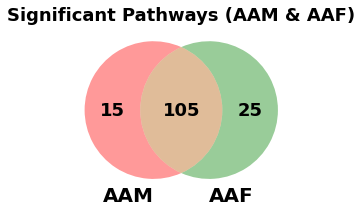

In [138]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'AAM'
label2 = 'AAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

137 137 141


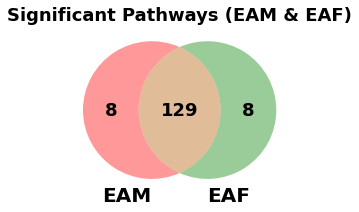

In [139]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Define variables
random_state = 40
label1 = 'EAM'
label2 = 'EAF'

# File path to the Excel file
file_path = f"../Output/LUSC_Samples/gene_symbols_{label1}_{label2}_random_state_{random_state}.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# List of sheet names and corresponding output file labels
sheets = {
    label1: label1,
    label2: label2,
    f"{label1}_{label2}_Common": f"{label1}_{label2}_Common"
}

label1_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_go_enrichment_results.csv")
label1_df_ls= label1_df_ls['name'].tolist()

label2_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label2}_go_enrichment_results.csv")
label2_df_ls= label2_df_ls['name'].tolist()

label_com_df_ls= pd.read_csv(f"../Output/LUSC_Samples/{label1}_{label2}_Common_{label1}_{label2}_Common_go_enrichment_results.csv")
label_com_df_ls= label_com_df_ls['name'].tolist()

print(len(label1_df_ls), len(label2_df_ls), len(label_com_df_ls))


# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(label1_df_ls), set(label2_df_ls)], (label1, label2))

# Title and Subtitles
plt.title(f'Significant Pathways ({label1} & {label2})', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

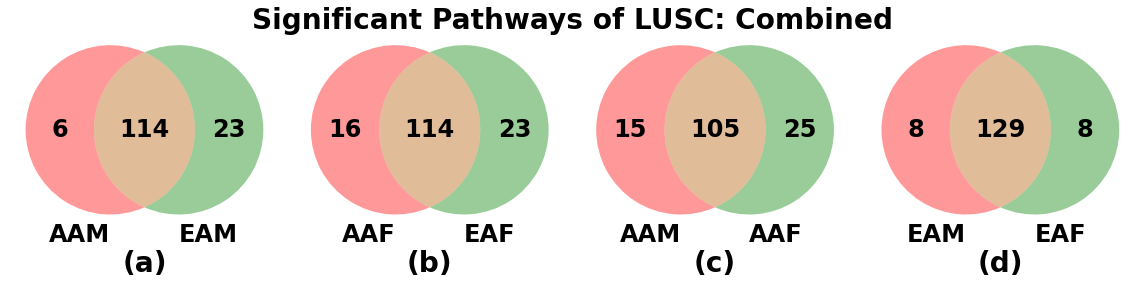

In [142]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

# Sample data for the Venn diagrams (you can replace these with your actual data)
sets_data = [
    (6, 23, 114),  # Data for Venn diagram (a)
    (16, 23, 114),  # Data for Venn diagram (b)
    (15, 25, 105),  # Data for Venn diagram (c)
    (8, 8, 129)    # Data for Venn diagram (d)
]

# Custom labels for each Venn diagram
labels = [
    ('AAM', 'EAM'),  # Labels for Venn diagram (a)
    ('AAF', 'EAF'),  # Labels for Venn diagram (b)
    ('AAM', 'AAF'),  # Labels for Venn diagram (c)
    ('EAM', 'EAF')   # Labels for Venn diagram (d)
]

# Titles for each subplot
sub_titles = ['(a)', '(b)', '(c)', '(d)']

# Create a figure with 4 subplots (1x4 grid)
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Iterate over the Venn diagrams to create each one
for i, ax in enumerate(axs):
    # Plot the Venn diagram
    venn = venn2_unweighted(subsets=sets_data[i], set_labels=labels[i], ax=ax)
    
    # Customize the appearance of numbers in the diagram
    venn.get_label_by_id('10').set_text(str(sets_data[i][0]))
    venn.get_label_by_id('01').set_text(str(sets_data[i][1]))
    venn.get_label_by_id('11').set_text(str(sets_data[i][2]))
    
    for text in venn.set_labels:
        text.set_fontsize(24)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:  # Check if the label exists (non-empty)
            text.set_fontsize(24)
            text.set_fontweight('bold')

#     # Customize the colors of the circles
#     venn.get_patch_by_id('10').set_color('red')
#     venn.get_patch_by_id('01').set_color('green')
#     venn.get_patch_by_id('11').set_color('brown')

    # Add the subtitle at the bottom of the plot
    ax.text(0.5, -0.15, sub_titles[i], fontsize=28, fontweight='bold', ha='center', va='center', transform=ax.transAxes)

# Add a single title for the entire figure
fig.suptitle('Significant Pathways of LUSC: Combined', fontsize=28, fontweight='bold')

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0, 1, 1.6])  # Leave space for the suptitle
plt.show()


# top 10

In [198]:
# AAM vs EAM from three single class classification

aam_ls= ['epidermis development', 'epithelial cell differentiation',  'epidermal cell differentiation', 'epithelium development', 'keratinocyte differentiation', 'organic substance transport', 'cell surface', 'multicellular organismal process', 'positive regulation of cellular process', 'regulation of cell migration']
eam_ls= ['multicellular organismal process', 'organic substance transport', 'Palmar hyperkeratosis', 'Palmoplantar hyperkeratosis', 'transport', 'epithelium development', 'cell motility', 'cytoplasm', 'membrane', 'plasma membrane']

In [199]:
sorted(aam_ls)

['cell surface',
 'epidermal cell differentiation',
 'epidermis development',
 'epithelial cell differentiation',
 'epithelium development',
 'keratinocyte differentiation',
 'multicellular organismal process',
 'organic substance transport',
 'positive regulation of cellular process',
 'regulation of cell migration']

In [200]:
len(set(aam_ls)), len(set(eam_ls)) 

(10, 10)

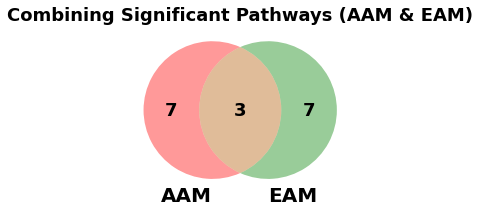

In [201]:
# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted([set(aam_ls), set(eam_ls)], ('AAM', 'EAM'))

# Title and Subtitles
plt.title('Combining Significant Pathways (AAM & EAM)', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

In [193]:
sorted(['multicellular organismal process', 'organic substance transport', 'Palmar hyperkeratosis', 'Palmoplantar hyperkeratosis', 'transport'])

['Palmar hyperkeratosis',
 'Palmoplantar hyperkeratosis',
 'multicellular organismal process',
 'organic substance transport',
 'transport']

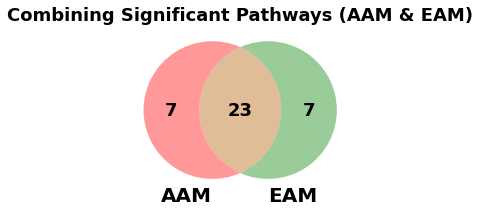

In [203]:
# Create a new figure for the Venn diagram
plt.figure(figsize=(4, 8))
venn = venn2_unweighted((7, 7, 23), ('AAM', 'EAM'))

# Title and Subtitles
plt.title('Combining Significant Pathways (AAM & EAM)', fontsize=18, fontweight='bold')

# Adjust the label sizes and font weight
for label in venn.set_labels:
    label.set_fontsize(20)
    label.set_fontweight('bold')
for label in venn.subset_labels:
    if label:
        label.set_fontsize(18)
        label.set_fontweight('bold')

# Show the plot
plt.show()

# LUSC